In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D




In [2]:
data = pd.read_csv("Aufnahme_Tennismatch_3Games_transformiert.csv")
data.head()

,Frame,Object.ID,Transformed.X,Transformed.Y,Speed,Spiel läuft,Game,Spieler schlägt
0,0,0,1.640339,-12.056091,0.682255,Nein,Spiel läuft nicht,Nein
1,1,0,1.640843,-12.053270,0.544785,Nein,Spiel läuft nicht,Nein
2,2,0,1.640531,-12.051376,0.431635,Nein,Spiel läuft nicht,Nein
3,3,0,1.638165,-12.051634,0.339757,Nein,Spiel läuft nicht,Nein
4,4,0,1.632475,-12.053030,0.266360,Nein,Spiel läuft nicht,Nein


In [3]:
# Daten filtern (Zeilen mit 'Spiel läuft nicht' entfernen)
filtered_data = data[data['Game'].isin(['1', '2', '3'])]

# Daten sortieren
filtered_data = filtered_data.sort_values(by=['Object.ID', 'Frame'])

# Differenzen berechnen
filtered_data['Delta.X'] = filtered_data.groupby(['Object.ID', 'Game'])['Transformed.X'].diff()
filtered_data['Delta.Y'] = filtered_data.groupby(['Object.ID', 'Game'])['Transformed.Y'].diff()

# Euklidische Distanz berechnen
filtered_data['Distanz'] = np.sqrt(filtered_data['Delta.X']**2 + filtered_data['Delta.Y']**2)

# Distanz pro Spiel und Spieler berechnen
distanz_pro_game = filtered_data.groupby(['Object.ID', 'Game'])['Distanz'].sum().reset_index()
distanz_pro_game.columns = ['Object.ID', 'Game', 'Distanz (m)']
print("Distanz pro Spiel:")
print(distanz_pro_game)

# Gesamtdistanz pro Spieler berechnen
gesamt_distanz = filtered_data.groupby('Object.ID')['Distanz'].sum().reset_index()
gesamt_distanz.columns = ['Object.ID', 'Gesamtstrecke (m)']
print("\nGesamtdistanz über alle Spiele:")
print(gesamt_distanz)

Distanz pro Spiel:
   Object.ID Game  Distanz (m)
0          0    1   104.451560
1          0    2   450.123871
2          0    3   142.879264
3          1    1    86.254112
4          1    2    50.278700
5          1    3   112.927692

Gesamtdistanz über alle Spiele:
   Object.ID  Gesamtstrecke (m)
0          0         697.454694
1          1         249.460504


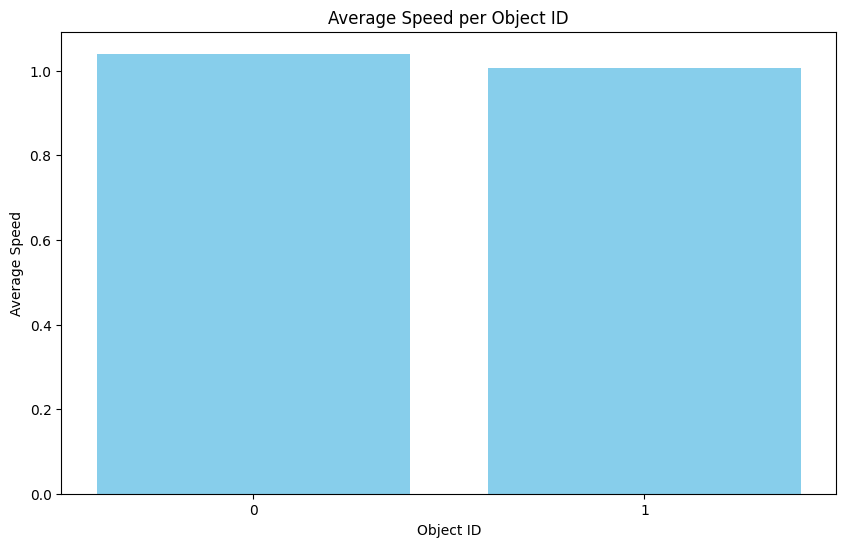

In [93]:
# durchschnittliche Geschwindigkeit
# Berechnung der Geschwindigkeit in jedem Frame


# Durchschnittliche Geschwindigkeit pro Objekt-ID berechnen
average_speed_per_object = data.groupby('Object.ID')['Speed'].mean().reset_index()

# Plot erstellen
plt.figure(figsize=(10, 6))
plt.bar(average_speed_per_object['Object.ID'], average_speed_per_object['Speed'], color='skyblue')
plt.xlabel('Object ID')
plt.ylabel('Average Speed')
plt.title('Average Speed per Object ID')
plt.xticks(average_speed_per_object['Object.ID'])
plt.show()

In [101]:
print(data['Game'].unique())


['Spiel läuft nicht' '1' '2' '3']


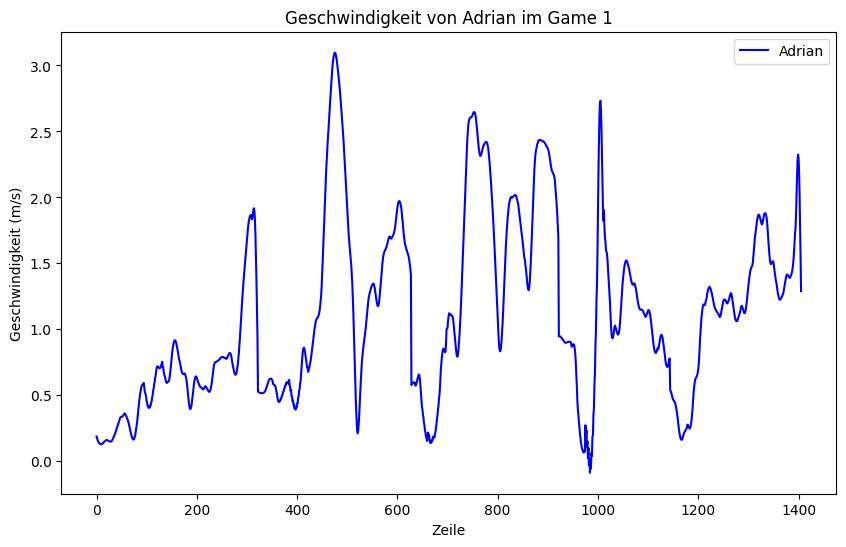

In [107]:



# Filtern der Zeilen für Spieler 1 (Object.ID == 0), Game 1 und Spiel läuft == Ja
player1_game1 = data[(data['Game'] == "1") & (data['Object.ID']== 0) & (data['Spiel läuft'] == 'Ja')]

# Erstellen einer neuen Grafik
plt.figure(figsize=(10, 6))

# Glatte Kurve für Spieler 1 (blau) - X-Achse ist eine fortlaufende Zahl (Zeilenindex)
plt.plot(range(len(player1_game1)), player1_game1['Speed'], color='blue', label='Adrian')

# Achsenbeschriftungen und Titel
plt.xlabel('Zeile')
plt.ylabel('Geschwindigkeit (m/s)')
plt.title('Geschwindigkeit von Adrian im Game 1')

# Legende hinzufügen
plt.legend()

# Grafik anzeigen
plt.show()


In [68]:
player1_subset

,Frame,Object.ID,Transformed.X,Transformed.Y,Speed,Spiel läuft,Smoothed_Speed
8492,4816,0,1.381596,-11.845245,0.511508,Ja,0.341183
8493,4817,0,1.383056,-11.808056,0.524701,Ja,0.336660
8494,4818,0,1.383532,-11.756489,0.535778,Ja,0.340181
8495,4819,0,1.382767,-11.703624,0.530493,Ja,0.351581
8496,4820,0,1.381027,-11.649833,0.522755,Ja,0.371452
...,...,...,...,...,...,...,...
16429,9415,0,3.192054,-16.901818,0.678369,Ja,0.587739
16431,9416,0,3.120462,-16.934152,0.758242,Ja,0.656858
16433,9417,0,3.060909,-16.958348,0.804411,Ja,0.734591
16435,9418,0,3.005331,-16.978672,0.848175,Ja,0.821216


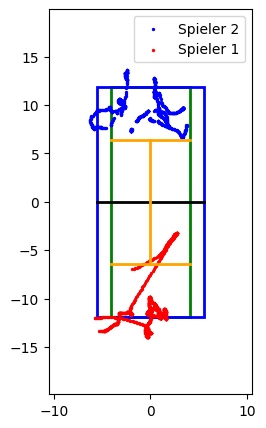

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Tennisfeldabmessungen (in Metern)
length = 23.77  
width = 8.23   
double_width = 10.97  
service_line_dist = 6.40  
net_position = 0  

# Zusätzlicher Platz um das Feld (3 Meter)
extra_space = 0

# Erstellen der Grafik
fig, ax = plt.subplots(figsize=(10, 5))

# Tennisfeld (Grundlinien und Seitenlinien für Einzel)
ax.add_patch(patches.Rectangle((-width / 2 - extra_space, -length / 2 - extra_space),
                                width + 2 * extra_space, length + 2 * extra_space,
                                fill=False, edgecolor="green", lw=2))

# Seitenlinien für Doppel (außerhalb des Einzelfelds)
ax.add_patch(patches.Rectangle((-double_width / 2 - extra_space, -length / 2 - extra_space),
                                double_width + 2 * extra_space, length + 2 * extra_space,
                                fill=False, edgecolor="blue", lw=2))

# Netz
plt.plot([-double_width / 2 - extra_space, double_width / 2 + extra_space],
         [net_position, net_position], color='black', lw=2)

# Aufschlaglinien
plt.plot([-width / 2 - extra_space, width / 2 + extra_space],
         [service_line_dist, service_line_dist], color='orange', lw=2)
plt.plot([-width / 2 - extra_space, width / 2 + extra_space],
         [-service_line_dist, -service_line_dist], color='orange', lw=2)

# Mittellinie
plt.plot([0, 0], [-service_line_dist, service_line_dist], color='orange', lw=2)

# Positionen von Spieler 2 einzeichnen
player2_positions = data[data['Object.ID'] == 1].head(1000)  

# Punkte plotten (X und Y korrekt)
plt.scatter(player2_positions['Transformed.X'], player2_positions['Transformed.Y'], color='blue', label='Spieler 2', s=2)


player1_positions = data[data['Object.ID'] == 0].head(1000)  

# Punkte plotten (X und Y korrekt)
plt.scatter(player1_positions['Transformed.X'], player1_positions['Transformed.Y'], color='red', label='Spieler 1', s=2)

# Achsenanpassungen
ax.set_xlim(-double_width / 2 - extra_space - 5, double_width / 2 + extra_space + 5)  # x-Achse erweitern
ax.set_ylim(-length / 2 - extra_space - 8, length / 2 + extra_space + 8)  # y-Achse erweitern
ax.set_aspect('equal')

# Achsen ausschalten und Legende hinzufügen
plt.axis()  
plt.legend()
plt.show()


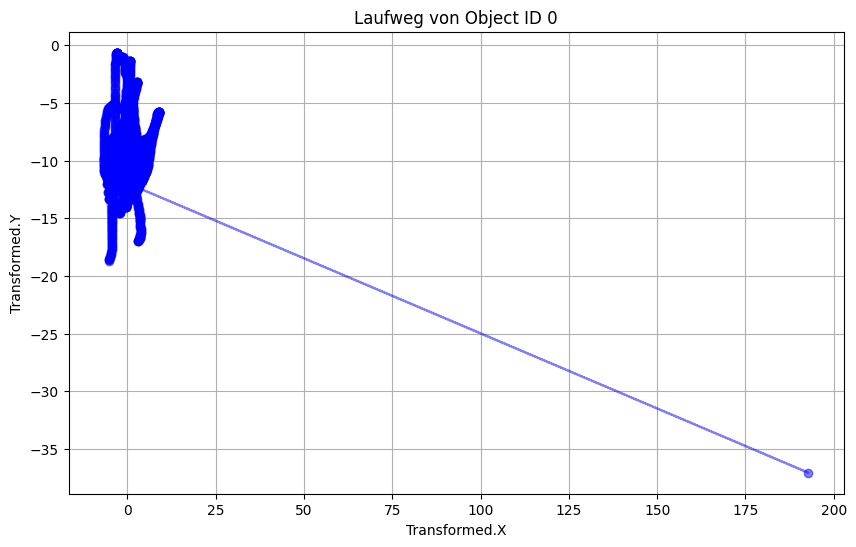

In [10]:
# Laufweg Object ID 0
# Filtern der Daten für Object ID 0
data_object_0 = data[data['Object.ID'] == 0]

# Plot des Laufwegs erstellen (Position X vs. Position Y)
plt.figure(figsize=(10, 6))
plt.plot(data_object_0['Transformed.X'], data_object_0['Transformed.Y'], marker='o', linestyle='-', color='b', alpha=0.5)
plt.xlabel('Transformed.X')
plt.ylabel('Transformed.Y')
plt.title('Laufweg von Object ID 0')
plt.grid(True)
plt.show()

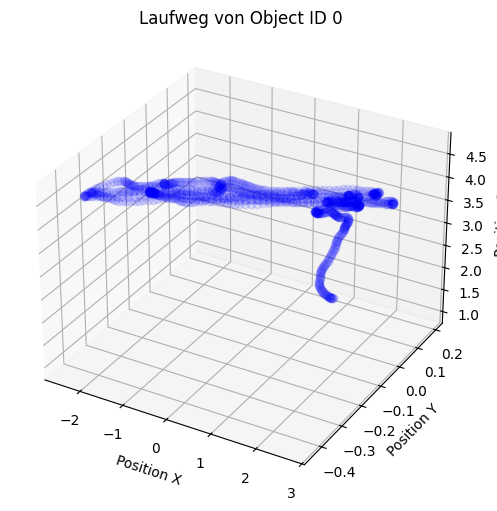

In [ ]:
# 3D Plot des Laufwegs erstellen (Position X vs. Position Y vs. Position Z)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(data_object_0['Transformed.X'], data_object_0['Position Y'], data_object_0['Position Z'], marker='o', linestyle='-', color='b', alpha=0.1)
ax.set_xlabel('Position X')
ax.set_ylabel('Position Y')
ax.set_zlabel('Position Z')
ax.set_title('Laufweg von Object ID 0')
plt.show()

In [31]:
# Frames finden, in denen die Geschwindigkeit 0 ist
frames_with_zero_speed = data_object_0[data_object_0['Speed'] == 0]['Frame']

# Ergebnis anzeigen
print("Frames mit Geschwindigkeit 0 für Object ID 0:")
print(frames_with_zero_speed)

Frames mit Geschwindigkeit 0 für Object ID 0:
Series([], Name: Frame, dtype: int64)


In [32]:
data_object_0.head()

,Frame,Object ID,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Bounding Box X1,Bounding Box Y1,...,Bounding Box X6,Bounding Box Y6,Bounding Box Z6,Bounding Box X7,Bounding Box Y7,Bounding Box Z7,Bounding Box X8,Bounding Box Y8,Bounding Box Z8,Speed
0,0,0,0.706526,0.191217,0.817250,0.917935,0.046710,0.013686,0.450839,0.018730,...,0.429567,0.267964,1.114594,0.911712,0.292499,1.121782,0.911712,0.428258,0.658438,0.919225
4,1,0,0.709247,0.185752,0.837220,0.219175,-0.252135,0.901972,0.460774,0.000949,...,0.439348,0.253049,1.143343,0.920615,0.277550,1.150521,0.920615,0.413050,0.688017,0.961854
8,2,0,0.716185,0.180756,0.859168,0.299344,-0.213217,0.784380,0.475418,-0.003989,...,0.453818,0.251558,1.164315,0.935716,0.276063,1.171493,0.935716,0.411710,0.708376,0.866211
13,3,0,0.723535,0.175098,0.889642,0.273525,-0.227934,0.830215,0.483038,-0.012180,...,0.461163,0.247973,1.197876,0.943746,0.272531,1.205065,0.943746,0.408307,0.741269,0.903342
17,4,0,0.737780,0.168931,0.927173,0.355842,-0.240790,0.889778,0.504070,-0.020383,...,0.481901,0.244266,1.236309,0.965306,0.268902,1.243521,0.965306,0.404908,0.778933,0.988083


In [33]:
# Maximalgeschwindigkeit pro Objekt-ID
# Maximale Geschwindigkeit pro Objekt-ID berechnen
max_speed_per_object = data.groupby('Object ID')['Speed'].max().reset_index()
max_speed_per_object

,Object ID,Speed
0,0,2.354457e+00
1,1,1.634216e+00
2,2,3.192763e-01
3,3,6.814095e+00
4,4,9.277739e+00
5,5,5.911665e-06
6,6,1.139745e+00
7,7,5.014872e+00
8,8,2.953141e+00
9,9,6.197865e+00


In [37]:
# Frames mit maximaler Geschwindigkeit
frames_with_max_speed = data_object_0[data_object_0['Speed'] == max_speed_per_object['Speed'][0]]['Frame']
frames_with_max_speed

4875    932
Name: Frame, dtype: int64

/var/folders/0l/jk3grg717z34yf9xh85kj0bh0000gn/T/ipykernel_39168/640359845.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_object_0['Position X 1'] = data_object_1['Position X'].values
/var/folders/0l/jk3grg717z34yf9xh85kj0bh0000gn/T/ipykernel_39168/640359845.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_object_0['Position Y 1'] = data_object_1['Position Y'].values
/var/folders/0l/jk3grg717z34yf9xh85kj0bh0000gn/T/ipykernel_39168/640359845.py:9: SettingWithCopyWarning: 
A value is trying 

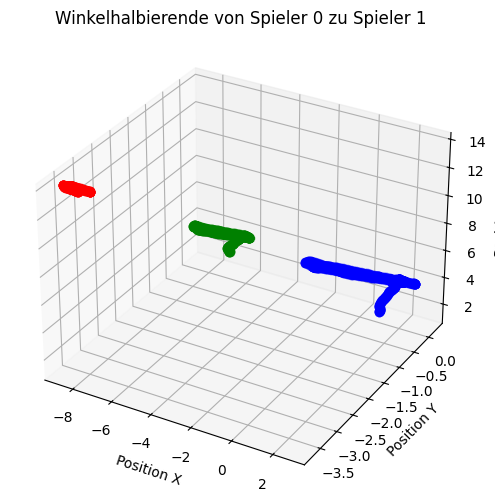

In [4]:
# Winkelhalbierende
def winkelhalbierende():